### Classificador do tipo MLP com Scikit-Learn

Este projeto implementa a MLP para lidar com o Sundanese Twitter Dataset

In [2]:
"""
@created_at: 03/06
Esta é a versão que funciona da MLP para o Dataset Sundanese Tweeter Dataset
Utilizando tanto as stopwords quando o CSV fornecido
"""
import numpy as np
import pandas as pd
from sklearn import metrics
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
import matplotlib.pyplot as plt
import seaborn as sns
import pickle

In [ ]:
df = pd.read_csv('sundanese_tweets.csv')
# Extrair colunas relevantes
corpus = df['tweet'].tolist()
targets = df['label'].tolist()

with open('stopwords.txt', 'r') as file:
    stopwords = file.read().splitlines()

train_features, test_features, train_targets, test_targets = train_test_split(corpus, targets, test_size=0.1, random_state=123)

vectorizer = TfidfVectorizer(stop_words=stopwords, lowercase=True, norm='l1')
train_features = vectorizer.fit_transform(train_features)
test_features = vectorizer.transform(test_features)


### Construindo a MLP

O bloco a seguir executa a MLP utilizando o MLPClassifier presente no pacote Scikit-Learn. Nele são definidos os hiperparâmetros que a rede terá. Para este método são passados os dados de treino e teste e alvos de treino e teste, além do número de neurônios.

In [ ]:
def buildMLPerceptron(train_features, test_features, train_targets, test_targets, num_neurons=5):
    """
    Build de um MLP
    Activation: ReLU
    Optimization Function: SGD, Stochastic Gradient Descent
    Learning rate: Inverse Scalind
    """
    # classifier = MLPClassifier(hidden_layer_sizes=num_neurons, max_iter=100, activation='relu', solver='sgd', verbose=10, random_state=762, learning_rate='invscaling')
    classifier = MLPClassifier(hidden_layer_sizes=(10, 10), max_iter=500, activation='relu', solver='adam', learning_rate='constant', learning_rate_init=0.001)
    classifier.fit(train_features, train_targets)

    predictions = classifier.predict(test_features)
    score = np.round(metrics.accuracy_score(test_targets, predictions), 2)
    print("Mean accuracy of predictions: " + str(score))
    print("Salvando o modelo...")

    with open('modelo.pkl', 'wb') as file:
        pickle.dump(classifier, file)


In [ ]:
# executando a MLP 
buildMLPerceptron(train_features, test_features, train_targets, test_targets)

## Carregando modelo gerado para testes

In [ ]:
print("Carregando o modelo para testar...")

# Carregar o modelo a partir do arquivo
with open('modelo.pkl', 'rb') as file:
    modelo_carregado = pickle.load(file)

data = pd.read_csv('test.csv')
# Extrair colunas relevantes
novas_frases = data['tweet'].tolist()
test_targets = data['label'].tolist()

new_features = vectorizer.transform(novas_frases).toarray()

# Realizar a vetorização das novas frases
novas_features = vectorizer.transform(novas_frases)

# Fazer previsões usando o modelo carregado
previsoes = modelo_carregado.predict(novas_features)

# Calcular métricas
accuracy = metrics.accuracy_score(test_targets, previsoes)
precision = metrics.precision_score(test_targets, previsoes, average='weighted', zero_division=0)
recall = metrics.recall_score(test_targets, previsoes, average='weighted', zero_division=0)
f1_score = metrics.f1_score(test_targets, previsoes, average='macro')
confusion_matrix = metrics.confusion_matrix(test_targets, previsoes)


# Imprimir as métricas
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1_score)
print("Confusion Matrix:")
print(confusion_matrix)

# Imprimir as previsões
for frase, previsao in zip(novas_frases, previsoes):
    # print(f"Frase: {frase}\nPrevisão: {previsao}")
    print(f"Previsão: {previsao} | Frase: {frase}")


## Plotando as métricas extraídas

Ao fim da execução é possível visualizar a matriz de confusão e outras métricas obtidas a partir do modelo

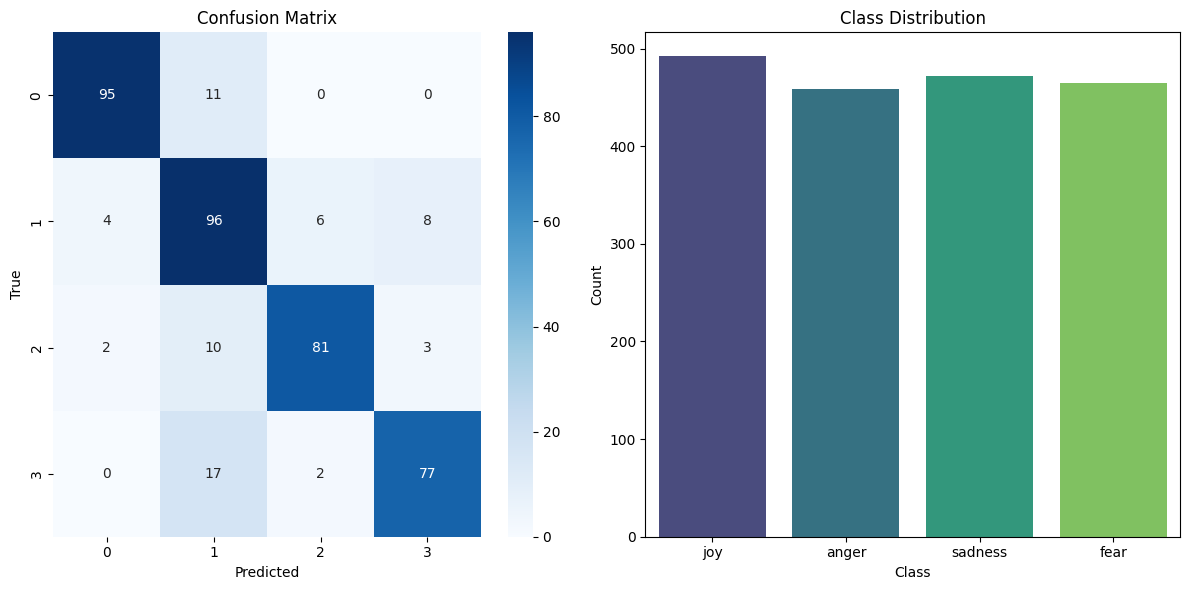

In [4]:
# Calcular a matriz de confusão
confusion = metrics.confusion_matrix(test_targets, previsoes)

# Criar a figura e as subplots
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Plotar a matriz de confusão na primeira subplot
sns.heatmap(confusion, annot=True, fmt='d', cmap='Blues', ax=axes[0])
axes[0].set_xlabel('Predicted')
axes[0].set_ylabel('True')
axes[0].set_title('Confusion Matrix')

# Plotar a distribuição das classes na segunda subplot
sns.countplot(x=train_targets, palette='viridis', ax=axes[1])
axes[1].set_xlabel('Class')
axes[1].set_ylabel('Count')
axes[1].set_title('Class Distribution')

# Ajustar o espaçamento entre as subplots
plt.tight_layout()

# Exibir o gráfico
plt.show()